In [8]:
from bs4 import BeautifulSoup
from splinter import Browser
import requests
import pymongo
import time
import numpy as np
import re
import pandas as pd
from fake_useragent import UserAgent # random user_agent to dodge website ban

In [ ]:
#need to run this before some of the other cells below, get_proxies() function runs this in code below
#this grabs some new proxy IP addresses from free-proxy-list.net, don't know if these are 'good' or get blacklisted
#quickly..if list gets old the IPs are stale and won't work usually
from itertools import cycle
import traceback
import requests
import random
from lxml.html import fromstring
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            #Grabbing IP and corresponding PORT
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies

In [20]:
#show the proxies, retrieve one at random..creates the list proxy_pool, which is referenced in some of the cells below
proxies = get_proxies()
print(proxies)
#print(random.sample((proxies),1))

{'177.75.161.191:37141', '87.76.10.119:4550', '1.10.187.243:61980', '118.173.233.39:37091', '125.25.54.145:50013', '177.84.63.161:44608', '122.248.45.35:53281'}


In [160]:
#practice bringing in ticker list to a list, to iterate thru
tick= (pd.read_csv('ticker_list.csv', header= None).values.tolist())
tickers = [i[0] for i in tick]
url = 'https://seekingalpha.com/symbol/'
new_url = url+tickers[1]+'/earnings'+'/transcripts'

In [4]:
tick

[['PG'], ['GE'], ['TMUS']]

In [200]:
#usable format here
tickers

['PG', 'GE', 'TMUS']

In [50]:
#this is to scrape a one off using your own ip address, -->scrapes transcript url 
import json
from fake_useragent import UserAgent
import random
import requests
import time
import numpy as np
delays = [7, 4, 6, 3, 7, 5]
delay = np.random.choice(delays)

symbol = 'six'

#put the page number you are seeking at end 
url = 'https://seekingalpha.com/symbol/'+symbol+'/earnings/more_transcripts?page=1'
#keep lists full from original scrape
#master_hrefs = []
#master_texts = []
#master_dates = []
#page_errors=[]
#page_errors_two=[]
#start with a large range to capture all the possible links; and then scraped their content and added to database; and if are still unscraped pages
#will need to index the range to grab just the leftover pages and run thru again, adding incrementally to database the final content; 
#while loop?
for item in range(1,2):
        ua = UserAgent()
        user_agent = ua.random
        #headers retrieved from inspecting page after form submission, user agent is changed randomly, referrer changes symbol with 
        #what is being looked at, not sure if it's necessary though..
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}
        #randomly select one of the proxy ip addresses
        #proxy = random.sample((paidProxies),1)[0]
        #proxy = random.sample((proxies),1)[0]
        #use requests to get the link, using proxy ip and headers, each request is a page full of links/hrefs, concatenate
        #the link with 'item' being the page number at the end...
        #resp = requests.get(url+str(item), headers=headers)
        #use this below for scraping page where you enter page number explicitly in url string above
        resp = requests.get(url, headers=headers)
        resp = json.loads(resp.text)
        if resp['html']=='':
            break
        #get the html from the page
        soup = BeautifulSoup(resp['html'])
        #get all the a links
        all_urls = soup.findAll('a')
        #filter for all non empty text in links into 'all_hrefs'
        all_hrefs = [item for item in all_urls if item.text!='']
        #this is where dates are stored, in 'date_on_by' div class
        all_dates = soup.findAll('div', {'class':'date_on_by'})
        #empty list to store dates
        all_href_dates = []
        #iterate thru append hrefs and dates to 'all_href_dates'
        for x in range(len(all_hrefs)):
            all_href_dates.append([all_hrefs[x], all_dates[x]])
        #filter only the links that also have 'transcript' in the text
        all_hrefs_trans = [item for item in all_href_dates if 'Transcript' in item[0].text]
        #grab the href link only
        hrefs = [item[0]['href'] for item in all_hrefs_trans]
        #grab the text only
        texts = [item[0].text for item in all_hrefs_trans]
        #grab the date only 
        dates = [item[1].text for item in all_hrefs_trans]
        #append to list(s), these lists are full from below scrape, but just adding incrementally from this single scrape
        master_hrefs+=hrefs
        master_texts+=texts
print(len(master_hrefs))
print(*master_hrefs, sep='\n')

47
/article/743341-six-flags-entertainments-ceo-discusses-q2-2012-results-earnings-call-transcript
/article/1206931-six-flags-ceo-discusses-q4-2012-results-earnings-call-transcript
/article/1480821-six-flags-entertainments-ceo-presents-at-goldman-sachs-lodging-gaming-restaurant-and-leisure-conference-transcript
/article/89041-six-flags-inc-q2-2008-earnings-call-transcript
/article/220723-six-flags-ceo-discusses-q2-2010-results-earnings-call-transcript
/article/2157993-six-flags-ceo-discusses-q1-2014-results-earnings-call-transcript
/article/67910-six-flags-inc-q4-2007-earnings-call-transcript
/article/1434611-six-flags-entertainment-corporations-management-presents-jpmorgan-tmt-conference-call-transcript
/article/636671-six-flags-entertainments-ceo-presents-at-barclays-capital-global-technology-media-and-telecommunications-conference-transcript
/article/2932056-six-flags-entertainments-six-ceo-james-reid-anderson-on-q4-2014-results-earnings-call-transcript
/article/368001-six-flags-ent

/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [31]:
#this for scraping remainder of error log, --> scrapes transcripts
error_log_two=[]
for i in range(len(error_log)):
#for i in range(1,2):
    try:
        #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
            #proxies=get_proxies()
        time.sleep(delay)
        ua = UserAgent()
        user_agent = ua.random
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}
        proxy = random.sample((paidProxies),1)[0]
        #proxy = random.sample((proxies),1)[0]
        #req_child = requests.get(base_url+error_log[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
        req_child = requests.get(base_url+error_log[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
        print("Request #%d"%i)
        print(error_log[i])
        print("proxy ip= {}".format(proxy))
        print("Number of Proxies = {}".format(len(proxies)))
        print(user_agent)
        #print(error_log[i])#the new links here being tried are from the error log
        print (req_child)
        print('-----------')
        if req_child.status_code!=200:
            error_log_two.append(error_log[i]) 
        soup = BeautifulSoup(req_child.text)
        body = soup.findAll('div', {'class':'sa-art'})
        master_url_body[error_log[i]] = body[0]
        #print(body[0])
    except:
        print("Request #%d"%item)
        print("Skipping..Connection Error")
        print(proxy)
        paidProxies.remove(proxy)#remove the non-working proxy from the proxy list
        print("Number of Proxies = {}".format(len(proxies)))
        print(error_log[i])
        print('-----------')
        error_log_two.append(error_log[i])

Request #0
proxy ip= 79.110.31.238:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10
<Response [403]>
-----------
Request #5
Skipping..Connection Error
79.110.31.238:8085
Number of Proxies = 9
/article/25033-netflix-q4-2006-earnings-call-transcript
-----------


/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Request #1
proxy ip= 188.72.126.124:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36
<Response [403]>
-----------
Request #5
Skipping..Connection Error
188.72.126.124:8085
Number of Proxies = 9
/article/4163354-netflixs-nflx-ceo-wilmot-hastings-q1-2018-results-earnings-call-transcript
-----------
Request #2
proxy ip= 5.8.46.70:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:22.0) Gecko/20130328 Firefox/22.0
<Response [403]>
-----------
Request #5
Skipping..Connection Error
5.8.46.70:8085
Number of Proxies = 9
/article/32729-netflix-q1-2007-earnings-call-transcript
-----------
Request #3
proxy ip= 91.243.89.70:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36
<Response [403]>
-----------
Request #5
Skipping..Connection Error
91.243.89.70:8085
Number of Proxies = 9
/article/41993-netflix-q2-2007-earnin

Request #23
proxy ip= 94.158.22.76:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36
<Response [403]>
-----------
Request #5
Skipping..Connection Error
94.158.22.76:8085
Number of Proxies = 9
/article/50856-netflix-q3-2007-earnings-call-transcript
-----------
Request #24
proxy ip= 185.251.70.205:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
<Response [403]>
-----------
Request #5
Skipping..Connection Error
185.251.70.205:8085
Number of Proxies = 9
/article/4062901-netflixs-nflx-ceo-reed-hastings-q1-2017-results-earnings-call-transcript
-----------
Request #25
proxy ip= 85.202.194.135:8085
Number of Proxies = 9
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
<Response [403]>
-----------
Request #5
Skipping..Connection Error
85.202.194.135:8085
Number of Proxi

In [49]:
#latest code for extracting transcript urls first...url found from inspecting site under 'network' tab, while page is loading, seeing all the requests go thru
#scroll thru "Name" box and find what looks like the right request, that's not for an image, etc...then under the 'headers'
#tab, 'General' look for the 'request URL'..it will likely have a 'page=" at the end ; sift thru all the ad, google, picture
#loading stuff...overall...need history, with dates attached, error handling, ip address rotation, and way of updating database with only
#new data each time...
from bs4 import BeautifulSoup
import json
import re
from fake_useragent import UserAgent
import random
import requests
import time
import numpy as np
delays = [7, 4, 6, 3, 7, 5]
delay = np.random.choice(delays)

symbol = 'six'

url = 'https://seekingalpha.com/symbol/'+symbol+'/earnings/more_transcripts?page='
master_hrefs = []
master_texts = []
master_dates = []
page_errors=[]

#start with a large range to capture all the possible links; and then scraped their content and added to database; and if are still unscraped pages
#will need to index the range to grab just the leftover pages and run thru again, adding incrementally to database the final content; 
for item in range(1,20):
    try:
        #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
            #proxies=get_proxies()
        time.sleep(delay)
        ua = UserAgent()
        user_agent = ua.random
        #headers retrieved from inspecting page after form submission, user agent is changed randomly, referrer changes symbol with 
        #what is being looked at, not sure if it's necessary though..
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}
        #randomly select one of the proxy ip addresses
        proxy = random.sample((paidProxies),1)[0]
        #proxy = random.sample((proxies),1)[0]
        #use requests to get the link, using proxy ip and headers, each request is a page full of links/hrefs, concatenate
        #the link with 'item' being the page number at the end...
        resp = requests.get(url+str(item), headers=headers, proxies={"http": proxy, "https": proxy})
        #
        resp = json.loads(resp.text)
        if resp['html']=='':
            break
        #get the html from the page
        soup = BeautifulSoup(resp['html'])
        #get all the a links
        all_urls = soup.findAll('a')
        #filter for all non empty text in links into 'all_hrefs'
        all_hrefs = [item for item in all_urls if item.text!='']
        #this is where dates are stored, in 'date_on_by' div class
        all_dates = soup.findAll('div', {'class':'date_on_by'})
        #empty list to store dates
        all_href_dates = []
        #iterate thru append hrefs and dates to 'all_href_dates'
        for x in range(len(all_hrefs)):
            all_href_dates.append([all_hrefs[x], all_dates[x]])
        #filter only the links that also have 'transcript' in the text
        all_hrefs_trans = [item for item in all_href_dates if 'Transcript' in item[0].text]
        #grab the href link only
        hrefs = [item[0]['href'] for item in all_hrefs_trans]
        #grab the text only
        texts = [item[0].text for item in all_hrefs_trans]
        #grab the date only 
        dates = [item[1].text for item in all_hrefs_trans]
        cleaned_dates = []
        for date in dates:
            tmp = re.search('\d{4}', date).span()[1]
            cleaned_dates.append(date[:tmp])
        #append to list(s)
        master_hrefs+=hrefs
        master_texts+=texts
        master_dates+=cleaned_dates
        print("Request #%d"%item)
        print(proxy)
        print("Number of Proxies = {}".format(len(proxies)))
        print(user_agent)
        print(url+str(item))
        print('-----------')
               
    except:
        print("Request #%d"%item)
        print("Skipping..Connection Error")
        print(proxy)
        #proxies.remove(proxy)#remove the non-working proxy from the proxy list
        print("Number of Proxies = {}".format(len(proxies)))
        print(url+str(item))
        print('-----------')
        page_errors.append(url+str(item))
        
print("First Pass: ")
print("Links Retrieved = {}".format(len(master_hrefs)))
print("Number of Page Errors = {}".format(len(page_errors)))
print('----------')
master_hrefs=list(set(master_hrefs))

#make a copy of page errors named 'page errors dup', use list so don't copy over
page_error_dup = list(page_errors)

while len(page_errors)>0:
    for i in range(len(page_errors)):
        try:
            #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
                #proxies=get_proxies()
            time.sleep(delay)
            ua = UserAgent()
            user_agent = ua.random
            headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.9',
            'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
            'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
            'upgrade-insecure-requests': '1',
            'user-agent': '{user_agent}'}
            proxy = random.sample((paidProxies),1)[0]
            #proxy = random.sample((proxies),1)[0]
            resp = requests.get(page_errors[i], headers=headers,proxies={"http": proxy, "https": proxy})
            resp = json.loads(resp.text)
            if resp['html']=='':
                break
            soup = BeautifulSoup(resp['html'])
            all_urls = soup.findAll('a')
            #filter for all non empty text in links into 'all_hrefs'
            all_hrefs = [item for item in all_urls if item.text!='']
            #this is where dates are stored, in 'date_on_by' div class
            all_dates = soup.findAll('div', {'class':'date_on_by'})
            #empty list to store dates
            all_href_dates = []
            #iterate thru append hrefs and dates to 'all_href_dates'..is this each a single list with two items? a list of lists?
            for x in range(len(all_hrefs)):
                all_href_dates.append([all_hrefs[x], all_dates[x]])
            #filter only the links that also have 'transcript' in the text
            all_hrefs_trans = [item for item in all_href_dates if 'Transcript' in item[0].text]
            #grab the href link only
            hrefs = [item[0]['href'] for item in all_hrefs_trans]
            #grab the text only of the href
            texts = [item[0].text for item in all_hrefs_trans]
            #grab the date only, index 1
            dates = [item[1].text for item in all_hrefs_trans]
            cleaned_dates = []
            for date in dates:
                tmp = re.search('\d{4}', date).span()[1]
                cleaned_dates.append(date[:tmp])
            #append to list(s)
            master_hrefs+=hrefs
            master_texts+=texts
            master_dates+=cleaned_dates
            print("Request #%d"%i)
            print(proxy)
            print("Number of Proxies = {}".format(len(proxies)))
            print(user_agent)
            print(page_errors[i])
            #my code to take page link out of page_errors_dup if it is successfully retrieved
            page_error_dup.remove(page_errors[i])
            print('-----------')
        except:
            print("Request #%d"%i)
            print("Skipping..Connection Error")
            print(proxy)
            #proxies.remove(proxy)#remove the non-working proxy from the proxy list
            print("Number of Proxies = {}".format(len(proxies)))
            print(page_errors[i])
            print('-----------')
            #page_errors_two.append(page_errors[i])
            
    #routine so you can break out of while loop
    print ("Number of errrors: {}".format(len(page_errors)), page_errors)
    comm = input('Proceed Y/N: ')
    if comm.lower() =='n':
        break
    else:
        pass

master_hrefs=list(set(master_hrefs))
print("Links Retrieved = {}".format(len(master_hrefs)))
if len(master_hrefs)>0:
    print("retrieved links = ")
    print(*master_hrefs, sep="\n")
print('-----------')

#now make the error log just what is left on the duplicate list, if any       
page_errors = list(page_error_dup)
print("Number of Page Errors = {}".format(len(page_errors)))
if len(page_errors)>0:
    print("non retreived = ")
    print(*page_errors, sep="\n")        


/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Request #1
Skipping..Connection Error
5.189.207.95:8085
Number of Proxies = 8
https://seekingalpha.com/symbol/six/earnings/more_transcripts?page=1
-----------
Request #2
185.251.70.122:8085
Number of Proxies = 8
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
https://seekingalpha.com/symbol/six/earnings/more_transcripts?page=2
-----------
Request #3
188.72.127.215:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36
https://seekingalpha.com/symbol/six/earnings/more_transcripts?page=3
-----------
Request #4
188.72.96.17:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36
https://seekingalpha.com/symbol/six/earnings/more_transcripts?page=4
-----------
First Pass: 
Links Retrieved = 35
Number of Page Errors = 1
----------
Request #0
Skipping..Connection Error
185.253.7.

In [ ]:
#comment this code 
cleaned_dates = []
for date in master_dates:
    tmp = re.search('\d{4}', date).span()[1]
    cleaned_dates.append(date[:tmp])

In [ ]:
#change the date to datetime object
from datetime import datetime
formatted_dates = []
for date in cleaned_dates:
    formatted_dates.append(datetime.strptime(date.strip(), '%b. %d, %Y'))

In [51]:
#save off master_hrefs to csv if have good list, for use later
import csv
with open('transcripts/six_master_hrefs_11_23_18.csv', 'w') as f:
    writer = csv.writer(f)
    for item in master_hrefs:
        writer.writerow([item])

In [9]:
#to load master_hrefs from csv
import csv
with open('nflx_master_hrefs.csv', 'r') as f:
  reader = csv.reader(f)
  your_list =list(reader)
#flatten the list of lists
flat_list=[]
for sublist in your_list:
    for item in sublist:
        flat_list.append(item)
print(flat_list)

['/article/2974366-netflix-nflx-management-presents-at-morgan-stanley-technology-media-and-telecom-conference-transcript', '/article/2565405-netflixs-nflx-ceo-reed-hastings-on-q3-2014-results-earnings-call-transcript', '/article/2152493-netflixs-ceo-discusses-q1-2014-results-earnings-call-transcript', '/article/1471761-netflixs-management-presents-at-nomura-3rd-annual-u-s-media-and-telecom-summit-conference-transcript', '/article/301738-netflixs-ceo-discusses-q3-2011-results-earnings-call-transcript', '/article/4088302-netflixs-nflx-ceo-reed-hastings-q2-2017-results-earnings-call-transcript', '/article/3820186-netflixs-nflx-ceo-reed-hastings-q4-2015-results-earnings-call-transcript', '/article/100779-netflix-q3-2008-earnings-call-transcript', '/article/1129391-netflixs-ceo-discusses-q4-2012-earnings-q-and-a-session-earnings-call-transcript', '/article/3997-full-transcript-of-netflix-s-3q05-conference-call-q-and-a-nflx', '/article/322180-netflixs-ceo-discusses-q4-2011-results-earnings-c

In [52]:
#this code goes with code above, scrapes the actual transcripts from the urls extracted above, applies date from scrape 
#above to the beginning of the text...if you are trying to scrape the remainder of an error log, can comment out
#the top portion of the code, but be sure to comment out the empty lists at top as well too!! Switch out proxy code
#based on using paid or free; 
from bs4 import BeautifulSoup
import numpy as np
import random
import json
import requests
import time
from fake_useragent import UserAgent
delays = [1, 5, 6, 2, 3, 8]#maybe alter the delays every now and again if having trouble getting thru; 
delay = np.random.choice(delays)
#comment out the below two lists if just scraping the error log, and 1st half of for loop below 
error_log=[]
master_url_body = {}
base_url = 'https://seekingalpha.com'
#if taking master href's from csv, use below
#master_hrefs=flat_list

symbol='hd'#only goes into referer header code

#just keep unique hrefs
master_hrefs=list(set(master_hrefs))

#for i in range(1,15):
for i in range(len(master_hrefs)):
    try:
        #if len(proxies)<2:#if using free, if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
            #proxies=get_proxies()
        time.sleep(delay)
        ua = UserAgent()
        user_agent = ua.random
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}
        proxy = random.sample((paidProxies),1)[0]
        #proxy = random.sample((proxies),1)[0]
        req_child = requests.get(base_url+master_hrefs[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
        print("Request #%d"%i)
        print(proxy)
        print("Number of Proxies = {}".format(len(proxies)))
        print(user_agent)
        print(master_hrefs[i])
        print (req_child)
        print('-----------')
        if req_child.status_code!=200:#if it's a 403 or something other than successful, append link to error log
            error_log.append(master_hrefs[i]) 
        soup = BeautifulSoup(req_child.text)
        body = soup.findAll('div', {'class':'sa-art'})
        #master_url_body[master_hrefs[i]] = [body[0].text]# can append link as key, date (from above) and text body as value to dictionary
        master_url_body[master_hrefs[i]] = body[0]#to keep html tags with it, needs to be a string to get into MDB
    except:
        print("Request #%d"%i)
        print("Skipping..Connection Error")
        print(proxy)
        #paidProxies.remove(proxy)
        #proxies.remove(proxy)#remove the non-working proxy from the proxy list, if is the free list; 
        print("Number of Proxies = {}".format(len(proxies)))
        print(master_hrefs[i])#what was the link not retrieved
        error_log.append(master_hrefs[i])#append the non retrieved link to error_log
        print('----------')

#only keep unique items in error log, (some are getting appended 2x, the '403's)
error_log = list(set(error_log))
print("First Pass: ")
print("Number of Errors = {}".format(len(error_log)))
print("Transcripts Retrieved = {}".format(len(master_url_body)))
print('----------')

# #make a copy of the error log named 'error log dup', 
error_log_dup = list(error_log)
while len(error_log)>0:
    for i in range(len(error_log)):
        try:
            #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
                #proxies=get_proxies()
            time.sleep(delay)
            ua = UserAgent()
            user_agent = ua.random
            headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.9',
            'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
            'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
            'upgrade-insecure-requests': '1',
            'user-agent': '{user_agent}'}
            proxy = random.sample((paidProxies),1)[0]
            #proxy = random.sample((proxies),1)[0]
            req_child = requests.get(base_url+error_log[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
            print("Request #%d"%i)
            print("proxy ip= {}".format(proxy))
            print("Number of Proxies = {}".format(len(proxies)))
            print(user_agent)
            print(error_log[i])#the new links here being tried are from the error log
            print (req_child)
            print('-----------')
            if req_child.status_code!=200:
                error_log.append(master_hrefs[i]) 
            soup = BeautifulSoup(req_child.text)
            body = soup.findAll('div', {'class':'sa-art'})
            #master_url_body[error_log[i]] = body[0].text
            master_url_body[error_log[i]] = body[0]# to keep html tags, needs to be a string to get into MDB
            #remove from error log from the duplicate list if successfully retrieved
            error_log_dup.remove(error_log[i])
        except:
            print("Request #%d"%i)
            print("Skipping..Connection Error")
            print("proxy ip= {}".format(proxy))
            #proxies.remove(proxy)#remove the non-working proxy from the proxy list,if is free list
            #paidProxies.remove(proxy)
            print("Number of Proxies = {}".format(len(proxies)))
            print(error_log[i])
            print('--------------')
            #error_log_two.append(error_log[i])
            
    #now make the error log just what is left on the duplicate list, if any       
    error_log = list(error_log_dup)
    print ("Number of errrors: {}".format(len(error_log)))
    comm = input('Proceed Y/N: ')
    if comm.lower() =='n':
        break
    else:
        pass
                   
print("Number of Errors = {}".format(len(error_log)))
print("Transcripts Retrieved = {}".format(len(master_url_body)))
if len(error_log)>0:
    print("non retreived = ")
    print(*error_log, sep="\n") 

    

Request #0
181.215.233.134:8085
Number of Proxies = 8
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36
/article/743341-six-flags-entertainments-ceo-discusses-q2-2012-results-earnings-call-transcript
<Response [200]>
-----------


/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Request #1
188.72.96.90:8085
Number of Proxies = 8
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; fr-fr) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.4 Safari/533.20.27
/article/1206931-six-flags-ceo-discusses-q4-2012-results-earnings-call-transcript
<Response [200]>
-----------
Request #2
Skipping..Connection Error
185.71.1.112:8085
Number of Proxies = 8
/article/4190041-six-flags-entertainment-six-q2-2018-results-earnings-call-transcript
----------
Request #3
91.243.89.70:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36
/article/1480821-six-flags-entertainments-ceo-presents-at-goldman-sachs-lodging-gaming-restaurant-and-leisure-conference-transcript
<Response [200]>
-----------
Request #4
5.8.46.70:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWe

Request #30
81.22.47.92:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
/article/2032081-six-flags-ceo-discusses-q4-2013-results-earnings-call-transcript
<Response [200]>
-----------
Request #31
191.96.172.96:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
/article/1561462-six-flags-entertainment-corp-six-management-discusses-q2-2013-results-earnings-call-transcript
<Response [200]>
-----------
Request #32
95.85.71.194:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
/article/281519-six-flags-ceo-discusses-q2-2011-results-earnings-call-transcript
<Response [200]>
-----------
Request #33
191.101.24.140:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 5.1; U; en; rv:1.8.1) Gecko/20061208 Firefox/5.0 Opera 11.11
/article/39922

In [53]:
#insert into mongodb; first open a terminal window and type 'mongod' to launch mongodb and be able to access it
#if this is adding to a collection, make sure you change the name of the document variable
#some of the key values from original dict are too long for MDB, need to create another collection that indexes the
#href key values; will have one collection with integers as keys, values as html conf call data, another collection with
#the keys from first collection assigned to href as values..
#create a new empty dictionary
#list what you have already: nflx_10_29_18; dal_ll_07_18;atvi_11_21_18; hd_11_21_18; six_11_23_18
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# Declare the database
db = client.transcripts_db
# Declare the collection
collection = db.six_11_23_18
master_url_body_dupl = {}
#all_keys = the keys from the original dictionary
all_keys = tuple(master_url_body.keys())
#loop thru original dictionary 
for item in master_url_body:
    #for this dictionary, key of all_keys.index(item) which is an integer, add value of master_url_body[Item]
    master_url_body_dupl[str(all_keys.index(item))] = str(master_url_body[item])#must be str to get html in there; 
collection.insert_one({'all_keys':all_keys})#add dictionary of the master_url_body keys; 
collection.insert_one(master_url_body_dupl)
print(len(all_keys))
print(all_keys)


('/article/743341-six-flags-entertainments-ceo-discusses-q2-2012-results-earnings-call-transcript', '/article/1206931-six-flags-ceo-discusses-q4-2012-results-earnings-call-transcript', '/article/1480821-six-flags-entertainments-ceo-presents-at-goldman-sachs-lodging-gaming-restaurant-and-leisure-conference-transcript', '/article/89041-six-flags-inc-q2-2008-earnings-call-transcript', '/article/2157993-six-flags-ceo-discusses-q1-2014-results-earnings-call-transcript', '/article/4048447-six-flags-entertainment-six-q4-2016-results-earnings-call-transcript', '/article/67910-six-flags-inc-q4-2007-earnings-call-transcript', '/article/3968615-six-flags-entertainments-six-ceo-john-duffey-q1-2016-results-earnings-call-transcript', '/article/1434611-six-flags-entertainment-corporations-management-presents-jpmorgan-tmt-conference-call-transcript', '/article/4214012-six-flags-entertainment-six-q3-2018-results-earnings-call-transcript', '/article/636671-six-flags-entertainments-ceo-presents-at-barcla

In [54]:
#verify 
results = db.six_11_23_18.find()
for result in results:
    print(result.keys())
print(len(result.keys()))

dict_keys(['_id', 'all_keys'])
dict_keys(['_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'])
48


In [27]:
print(len(master_hrefs))
print(len(master_url_body))
print(len(error_log))
print(error_log)
#print(*master_hrefs, sep='\n')
#print(master_hrefs)
print(master_url_body.keys())

52
52
0
[]
52
dict_keys(['/article/1814522-activision-blizzard-management-discusses-q3-2013-results-earnings-call-transcript', '/article/37037-activision-f4q07-qtr-end-3-31-07-earnings-call-transcript', '/article/251909-activision-blizzards-ceo-discusses-q4-2010-results-earnings-call-transcript', '/article/52919-activision-f2q08-qtr-end-9-30-07-earnings-call-transcript', '/article/3996088-activision-blizzard-atvi-robert-kotick-q2-2016-results-earnings-call-transcript', '/article/6708-activision-f3q06-qtr-ending-dec-31-2005-earnings-conference-call-transcript-atvi', '/article/2891046-activision-blizzard-atvi-q4-2014-results-earnings-call-transcript', '/article/306409-activision-blizzards-ceo-discusses-q3-2011-results-earnings-call-transcript', '/article/19997-activision-f2q07-qtr-end-9-30-06-earnings-call-transcript', '/article/284441-activision-blizzards-ceo-discusses-q2-2011-results-earnings-call-transcript', '/article/1167011-activision-blizzard-management-discusses-q4-2012-results-e

In [55]:
#for scraping user article urls, if proxy ips are a bad lot, will get connection errors; 
#latest code...url found from inspecting site under 'network' tab, while page is loading, seeing all the requests go thru
#scroll thru "Name" box and find what looks like the right request, that's not for an image, etc...then under the 'headers'
#tab, 'General' look for the 'request URL'..it will likely have a 'page=" at the end 
import json
from fake_useragent import UserAgent
import random
import requests
import time
import numpy as np
from bs4 import BeautifulSoup
delays = [7, 4, 6, 3, 8, 9]#randomize delays
delay = np.random.choice(delays)

symbol = 'six'

url = 'https://seekingalpha.com/symbol/'+symbol+'/more_focus?page='
master_hrefs = []
master_texts = []
page_errors=[]

for item in range(1,20):
    try:
        if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
            proxies=get_proxies()
        time.sleep(delay)
        ua = UserAgent()
        user_agent = ua.random
        #need these headers to appear more like actual user..got from inspecting network on form post
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}
        #randomly select one of the proxy ip addresses
        #if want one of the paid proxies
        proxy = random.sample((paidProxies),1)[0]
        #if want one of the free proxies
        #proxy = random.sample((proxies),1)[0]
        #loaded proxies
        #proxy = random.sample((loaded_proxies),1)[0]
        #use requests to get the link, using proxy ip and headers, each request is a page full of links/hrefs
        resp = requests.get(url+str(item), headers=headers,  proxies={"http": proxy, "https": proxy})
        
        resp = json.loads(resp.text)
        #if it's blank, stop
        if resp['html']=='':
            break
        #get the html from the page
        soup = BeautifulSoup(resp['html'])
        #get all the a links
        all_urls = soup.findAll('a')
        #filter only the non-empty links that also have 'transcript' in the text
        sasourced = []
        for x in soup.findAll('a'):
            try:
                a = x['sasource'] #the targeted links we want all have 'sascourced' tags
                sasourced.append(x)
            except:
                pass
        all_hrefs = [x['href'] for x in sasourced if 'author' not in x['href']]#don't want the auther href's
        #grab the text
        texts = [x.text for x in sasourced]
        #append to list(s)
        master_hrefs+=all_hrefs
        master_texts+=texts
        ####
        print("Request #%d"%item)
        print(proxy)
        print("Number of Proxies = {}".format(len(proxies)))
        print(user_agent)
        print(url+str(item))
        print('-----------')
        
    except:
        print("Request #%d"%item)
        print("Skipping..Connection Error")
        print(proxy)
       # proxies.remove(proxy)#remove the non-working proxy from the proxy list
        print("Number of Proxies = {}".format(len(proxies)))
        print(url+str(item))
        print('-----------')
        page_errors.append(url+str(item))
        
print("First Pass: ")
print("Links Retrieved = {}".format(len(master_hrefs)))
print("Number of Errors = {}".format(len(page_errors)))
print('-----------')
master_hrefs=list(set(master_hrefs))
#make a copy of page errors named 'page errors dup', use list so don't copy over
page_error_dup = list(page_errors)

while len(page_errors)>0:
    for i in range(len(page_errors)):
        try:
            #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
                #proxies=get_proxies()
            time.sleep(delay)
            ua = UserAgent()
            user_agent = ua.random
            headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.9',
            'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
            'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
            'upgrade-insecure-requests': '1',
            'user-agent': '{user_agent}'}
            proxy = random.sample((paidProxies),1)[0]
            #free proxy list
            #proxy = random.sample((proxies),1)[0]
            resp = requests.get(page_errors[i], headers=headers,proxies={"http": proxy, "https": proxy})
            resp = json.loads(resp.text)
            if resp['html']=='':
                break
            soup = BeautifulSoup(resp['html'])
            all_urls = soup.findAll('a')
            sasourced = []
            for x in soup.findAll('a'):
                try:
                    a = x['sasource']
                    sasourced.append(x)
                except:
                    pass
            all_hrefs = [x['href'] for x in sasourced]
            #grab the text
            texts = [x.text for x in sasourced]
            #append to list(s)
            master_hrefs+=hrefs
            master_texts+=texts
            print("Request #%d"%i)
            print(proxy)
            print("Number of Proxies = {}".format(len(proxies)))
            print(user_agent)
            print(page_errors[i])
             #my code to take page link out of page_errors_dup if it is successfully retrieved
            page_error_dup.remove(page_errors[i])
            print('-----------')
        except:
            print("Request #%d"%i)
            print("Skipping..Connection Error")
            print(proxy)
            #proxies.remove(proxy)#remove the non working proxy from the list
            print("Number of Proxies = {}".format(len(proxies)))
            print(page_errors[i])
            print('-----------')

    #now make error log just what is left on the duplicate list, if any
    page_errors=list(page_error_dup)
    #routine so you can break out of the while loop
    print('Number of errors: {}'.format(len(page_errors)), page_errors)
    comm= input('Proceed Y/N: ')
    if comm.lower()=='n':
        break
    else:
        pass
    
master_hrefs=list(set(master_hrefs))
print("# of Links Retrieved = {}".format(len(master_hrefs)))
if len(master_hrefs)>0:
    print("Links Retrieved = ")
    print(*master_hrefs, sep="\n")
print('----------')

print("Number of Page Errors = {}".format(len(page_errors)))
if len(page_errors)>0:
    print("non retreived= ")
    print(*page_errors, sep="\n")



/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Request #1
109.236.52.244:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36
https://seekingalpha.com/symbol/six/more_focus?page=1
-----------
Request #2
Skipping..Connection Error
185.71.1.112:8085
Number of Proxies = 8
https://seekingalpha.com/symbol/six/more_focus?page=2
-----------
Request #3
85.202.194.135:8085
Number of Proxies = 8
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.2; Trident/4.0; Media Center PC 4.0; SLCC1; .NET CLR 3.0.04320)
https://seekingalpha.com/symbol/six/more_focus?page=3
-----------
Request #4
5.8.46.198:8085
Number of Proxies = 8
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
https://seekingalpha.com/symbol/six/more_focus?page=4
-----------
First Pass: 
Links Retrieved = 36
Number of Errors = 1
-----------
Request #0
185.101.70.38:8085
Number of Proxies = 8
Mozilla/5.0 (Windows NT 5.1) AppleWeb

In [56]:
#save off master_hrefs to csv if have good list, for use later
import csv
with open('user_articles/six_master_hrefs_articles_11_22_18.csv', 'w') as f:
    writer = csv.writer(f)
    for item in master_hrefs:
        writer.writerow([item])

In [59]:
#this code goes with code above, gets the actual content from the extracted user article urls; works if proxy ips are good, 
#which they sometimes are, sometimes aren't 

from fake_useragent import UserAgent
delays = [7, 4, 6, 3, 8, 9]
delay = np.random.choice(delays)
#comment out the below two lines if just scraping the error log
error_log=[]
master_url_body = {}

base_url = 'https://seekingalpha.com'
#if taking master_href from csv
#master_hrefs=flat_list
symbol= 'nflx'#only used in referer header code here; 
#just keep unique hrefs
master_hrefs=list(set(master_hrefs))

#for i in range(1,50):
for i in range(len(master_hrefs)):
    try:
        #if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
            #proxies=get_proxies()
        time.sleep(delay)
        ua = UserAgent()
        user_agent = ua.random#randomize the user agent
        #put in headers from inspecting site on a request
        headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
        'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
        'upgrade-insecure-requests': '1',
        'user-agent': '{user_agent}'}#put in the randome user agent
        #if want one of the paid proxies
        proxy = random.sample((paidProxies),1)[0]
        #if want one of the free proxies
        #proxy = random.sample((proxies),1)[0]
        req_child = requests.get(base_url+master_hrefs[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
        print("Request #%d"%i)
        print(proxy)
        print(user_agent)
        print(master_hrefs[i])
        print("Number of Proxies = {}".format(len(proxies)))
        print (req_child)
        print('-----------')
        if req_child.status_code!=200:   #i.e. there is some kind of error or blocking happening..
            error_log.append(master_hrefs[i]) #append to error log
        soup = BeautifulSoup(req_child.text)
        body = soup.findAll('div', {'class':'sa-art'})
        master_url_body[master_hrefs[i]] = body[0]
    except:
        print("Request #%d"%i)
        print("Skipping..Connection Error")
        print(proxy)
        #proxies.remove(proxy)#remove the non working proxy from the list
        print("Number of Proxies = {}".format(len(proxies)))
        print(master_hrefs[i])
        error_log.append(master_hrefs[i])
        print('----------')

#only keep unique items in error log (some are getting appended 2x, the 403's)
error_log=list(set(error_log))
print("First Pass: ")
print("Number of Errors = {}".format(len(error_log)))
print("Articles Retrieved = {}".format(len(master_url_body)))
print('----------')
#make a copy of error log
error_log_dup=list(error_log)


while len(error_log)>0:#if we have errors, run again to pick up
    for i in range(len(error_log)):
        try:
            if len(proxies)<2:#if we have deleted enough bad proxies due to connection errors, need to rerun and get new ones
                proxies=get_proxies()
            time.sleep(delay)
            ua = UserAgent()
            user_agent = ua.random
            headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'accept-encoding': 'gzip, deflate, br',
            'accept-language': 'en-US,en;q=0.9',
            'cookie': 'machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=',
            'referer': 'https://seekingalpha.com/symbol/'+symbol+'/earnings/estimates',
            'upgrade-insecure-requests': '1',
            'user-agent': '{user_agent}'}
            proxy = random.sample((paidProxies),1)[0]
            #proxy = random.sample((proxies),1)[0]
            req_child = requests.get(base_url+error_log[i]+'?part=single', headers=headers, proxies={"http": proxy, "https": proxy})
            print("Request #%d"%i)
            print("proxy ip= {}".format(proxy))
            print(user_agent)
            print(error_log[i])
            print("Number of Proxies = {}".format(len(proxies)))
            print (req_child)
            print('-----------')
            if req_child.status_code==200:
                error_log_dup.remove(error_log[i])
            soup = BeautifulSoup(req_child.text)
            body = soup.findAll('div', {'class':'sa-art'})
            master_url_body[error_log[i]] = body[0]
            error_log_dup.remove(error_log[i])
        except:
            print("Request #%d"%i)
            print("Skipping..Connection Error")
            print(proxy)
            #proxies.remove(proxy)#remove the non working proxy from the list
            print(error_log[i])
            print("Number of Proxies = {}".format(len(proxies)))
            print('--------------')
        
    #now make the error log just what is left on the duplicate list, if any;
    error_log=list(error_log_dup)
    print("Number of Errors = {}".format(len(error_log)))
    print("Articles Retrieved = {}".format(len(master_url_body)))
    comm=input('Proceed Y/N: ')
    if comm.lower()=='n':
        break
    else:
        pass
    

print("Number of Errors={}".format(len(error_log)))
print("Articles Retrieved = {}".format(len(master_url_body)))
if len(error_log)>0:
    print("non retrieved = ")
    print(*error_log, sep="\n")



Request #0
181.215.21.240:8085
Mozilla/5.0 (X11; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0
/article/3996676-six-flags-offers-exciting-dividend-yield-little-safety
Number of Proxies = 8
<Response [403]>
-----------
Request #0
Skipping..Connection Error
181.215.21.240:8085
Number of Proxies = 8
/article/3996676-six-flags-offers-exciting-dividend-yield-little-safety
----------


/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Request #1
85.202.194.135:8085
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36
/article/83869-six-flags-is-no-bargain-even-at-a-buck
Number of Proxies = 8
<Response [200]>
-----------
Request #2
185.251.70.205:8085
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:21.0) Gecko/20130331 Firefox/21.0
/article/286405-six-flags-looks-attractive-with-double-the-dividend
Number of Proxies = 8
<Response [200]>
-----------
Request #3
181.214.37.111:8085
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36
/article/4190041-six-flags-entertainment-six-q2-2018-results-earnings-call-transcript
Number of Proxies = 8
<Response [200]>
-----------
Request #4
95.85.71.194:8085
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36
/article/4165823-six-flags-entertainment-six-q1-2018-results-earnings-call-transcript
Number of Proxies = 8
<Response [200]>
-

Request #34
91.243.94.168:8085
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36
/article/4008940-six-flags-wide-moat
Number of Proxies = 8
<Response [200]>
-----------
Request #35
93.179.91.61:8085
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36
/article/3916776-six-flags-continues-execute-moat-worth-much
Number of Proxies = 8
<Response [200]>
-----------
Request #36
191.101.24.140:8085
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36
/article/67986-six-flags-more-excuses-potholes-ahead
Number of Proxies = 8
<Response [200]>
-----------
Request #37
141.101.132.174:8085
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0; FunWebProducts)
/article/654261-six-flags-too-risky-to-be-attractive-and-too-expensive-at-current-market-price
Number of Proxies = 8
<Response [200]>
-----------
Request #38
185.251.70.53:8085
Mozill

In [60]:
print(len(master_url_body))

47


In [61]:
#saved list:nflx_11_19_18,hd_11_21_18, six_11_23_18, atvi_ll_22_18
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# Declare the database
db = client.articles_db
# Declare the collection
collection = db.six_11_23_18
master_url_body_dupl = {}
#all_keys = the keys from the original dictionary
all_keys = tuple(master_url_body.keys())
#loop thru original dictionary 
for item in master_url_body:
    #for this dictionary, key of all_keys.index(item) which is an integer, add value of master_url_body[Item]
    master_url_body_dupl[str(all_keys.index(item))] = str(master_url_body[item])#must be str to get html in there; 
collection.insert_one({'all_keys':all_keys})#add dictionary of the master_url_body keys; 
collection.insert_one(master_url_body_dupl)
print(len(all_keys))
print(all_keys)

('/article/83869-six-flags-is-no-bargain-even-at-a-buck', '/article/286405-six-flags-looks-attractive-with-double-the-dividend', '/article/4190041-six-flags-entertainment-six-q2-2018-results-earnings-call-transcript', '/article/4165823-six-flags-entertainment-six-q1-2018-results-earnings-call-transcript', '/article/4092876-six-flags-lose-25-percent-customers-new-park-meadowlands', '/article/89419-shapiro-spins-like-crazy-for-six-flags', '/article/4109097-six-flags-good-another-bite-avoiding-major-blows', '/article/261816-six-flags-fun-ride-ahead', '/article/4048447-six-flags-entertainment-six-q4-2016-results-earnings-call-transcript', '/article/105564-can-six-flags-get-off-the-debt-rollercoaster', '/article/4107649-six-flags-better-atlantic-city-2_0', '/article/3968615-six-flags-entertainments-six-ceo-john-duffey-q1-2016-results-earnings-call-transcript', '/article/4214012-six-flags-entertainment-six-q3-2018-results-earnings-call-transcript', '/article/3980089-six-flags-expect-roller-c

In [63]:
#verify 
results = db.six_11_23_18.find()
for result in results:
    print(result.keys())
print(len(result.keys()))

dict_keys(['_id', 'all_keys'])
dict_keys(['_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'])
48


In [21]:
#pickle the file
import os
import pickle
os.chdir(r"/Users/forrestbadgley/Documents/DataScience/transcript_scrape/transcripts")
with open('master_'+symbol+'.pickle', 'wb') as handle:
    pickle.dump(master_url_body, handle)

In [22]:
#open the pickled file
with open('master_'+symbol+'.pickle', 'rb') as handle:
    a = pickle.load(handle)

In [205]:
#write file to a .txt
import json 
import os 
os.chdir(r"/Users/forrestbadgley/Documents/DataScience/transcript_scrape/transcripts")
with open ("master_"+symbol+".txt", 'w') as f:
    f.write(json.dumps(master_url_body))

In [87]:
#insert into mongodb; first open a terminal window and type 'mongod' to launch mongodb and be able to access it
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# Declare the database
db = client.transcripts_db
# Declare the collection
collection = db.verizon
# Insert the document into the database
# The database and collection, if they don't already exist, will be created at this point. Inserting a document..
collection.insert_one(master_url_body)

In [88]:
# Verify results:
results = db.verizon.find()
for result in results:
    print(result)

{'_id': ObjectId('5ba5a838d89d4f0242dbc0f6'), '/article/4189615-verizon-communications-vz-ceo-lowell-mcadam-q2-2018-results-earnings-call-transcript': "Verizon Communications (NYSE:VZ) Q2 2018 Earnings Conference Call July 24, 2018  8:30 AM ET\nExecutives\nBrady Connor - SVP, IR\nLowell McAdam - Chairman & CEO\nHans Vestberg - Incoming CEO\nMatthew Ellis - CFO\nAnalysts\nJohn Hodulik - UBS\nSimon Flannery - Morgan Stanley\nPhilip Cusick - JPMorgan\nDavid Barden - Bank of America\nBrett Feldman - Goldman Sachs\nMichael Rollins - Citi\nCraig Moffett - MoffettNathanson\nJennifer Fritzsch - Wells Fargo\nOperator\nGood morning, and welcome to the Verizon Second Quarter 2018 Earnings Conference Call. At this time all participants have been placed in a listen-only mode and the floor will be open for questions following the presentation. [Operator Instructions] Today's conference is being recorded. If you have any objections, you may disconnect at this time.\nIt is now my pleasure to turn the 

In [95]:
#search the keys in the document; to print values only is .values()
print(master_url_body.keys())

dict_keys(['/article/4189615-verizon-communications-vz-ceo-lowell-mcadam-q2-2018-results-earnings-call-transcript', '/article/4174495-verizon-communications-vz-presents-moffettnathanson-5th-annual-media-and-communications', '/article/4154212-verizon-communications-vz-management-presents-deutsche-bank-media-telecom-and-business', '/article/4139417-verizon-communications-vz-ceo-lowell-mcadam-q4-2017-results-earnings-call-transcript', '/article/4130535-verizon-communications-vz-management-presents-barclays-global-financial-service-conference', '/article/4129887-verizon-communications-vz-presents-45th-annual-ubs-global-media-and-communications-conference', '/article/4114751-verizon-communications-vz-q3-2017-results-earnings-call-transcript', '/article/4107060-verizons-vz-management-presents-goldman-sachs-26th-communacopia-conference-transcript', '/article/4105449-verizons-vz-management-presents-bank-america-merrill-lynch-media-communications-and', '/article/4096828-verizon-communications-v

In [261]:
#dictionary code, don't need separate key label, can just use the data...
a = {'aaa':1, 'bad':2, 'cdc':3}
for key in a.keys():
    if 'b' in key:
        print ('Yes')

Yes


In [ ]:
#full request headers: :authority: seekingalpha.com
:method: GET
:path: /search/?q=tsla
:scheme: https
accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8
accept-encoding: gzip, deflate, br
accept-language: en-US,en;q=0.9
cookie: machine_cookie=7435669556096; __utmc=150447540; __utmz=150447540.1534375165.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __gads=ID=36a84f6b9c6248bc:T=1534375165:S=ALNI_Mb3zGC7Poy8X5s_SUkHD48HSAGlOw; __hssrc=1; hubspotutk=d0d89dae354838fa1afa86a6036099a6; OX_plg=pm; h_px=1; _igt=8912b2d4-a7e1-460b-b3ec-8b624402269d; trc_cookie_storage=taboola%2520global%253Auser-id%3D77e6989d-7abc-4023-bf0d-55c621050a9a-tuctd99c8d; __utma=150447540.1036569242.1534375165.1536436785.1536448131.31; __hstc=234155329.d0d89dae354838fa1afa86a6036099a6.1534375167205.1536436787043.1536448134644.31; _ig=485bdb5e-a97e-450e-ec9b-5b8a4621baac; dmxRegion=false; __utmt=1; __utmb=150447540.18.10.1536448131; __hssc=234155329.18.1536448134644; _px=VTvc4Ey/XIV+DsoZtGll1elRoNgExvsJCy9jR+AjboFqutLRB04ZtzPBUeHse7OdDKDK0SLo+70yxMuKsn8w/A==:1000:kHXx4KqIF2zrU6/wK09CsRTdIsUAe2ym3vi2PDspfxTaXAaF4cLppXDYa5iXlTbe9dJW//MQUDlCdGXpXA8J39r+nuPQR1EGdpJhxiutLwgLA1P/YFRaZ1fxM52mwanLlqJlfIWb9V6UeqqQARxw2Fs9lNV224Xr9aDcMnhC2Q57fmwz2NtDqWEMcsyPel4FZwv0kogYpV+d6H7jJ31kCfl/jJXou2VDVNizw/1bf3yWMniDokMXopLFqnPSwK65cfsCjsJ/WxFpNK6OKttGbA==; _px2=eyJ1IjoiMzM2ZDA0NTAtYjNjMi0xMWU4LTkzNjgtMTVlODRjZGE3MzY2IiwidiI6ImQzN2QwZWIwLTY0NWItMTFlOC04NDM0LTI3OGNiYWNkYmQ2YSIsInQiOjE1MzY0NTEyMzE4NjAsImgiOiI0NGU5MDhlMDQxM2MzMTU5OWI1ODFjNTdiNjk0NzFhYjIyZTYzYTQ5NzhlOGQ2ZGNiMDdhY2Q2NWI0Mzc0M2IzIn0=
referer: https://seekingalpha.com/symbol/PG?s=pg
upgrade-insecure-requests: 1
user-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36
q: tsla

In [68]:
#Get scroll height, this next bit of code will load the page fully, before we scrape
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
SCROLL_PAUSE_TIME = 1


last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height



https://seekingalpha.com/symbol/TMUS/earnings/transcripts
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
Request #1 138.68.253.204:80
Skipping. Connnection error
Request #2 138.68.253.204:80
Skipping. Connnection error


/Users/forrestbadgley/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/forrestbadgley/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


[]


IndexError: list index out of range

In [ ]:
#If you are copy pasting proxy ips, put in the list below
#proxies = ['121.129.127.209:80', '124.41.215.238:45169', '185.93.3.123:8080', '194.182.64.67:3128', '106.0.38.174:8080', '163.172.175.210:3128', '13.92.196.150:8080']
proxies = get_proxies()
proxy_pool = cycle(proxies)

url = 'https://httpbin.org/ip'
for i in range(1,11):
    #Get a proxy from the pool
    proxy = next(proxy_pool)
    print("Request #%d"%i)
    try:
        response = requests.get(url,proxies={"http": proxy, "https": proxy})
        print(response.json())
    except:
        #Most free proxies will often get connection errors. You will have retry the entire request using another proxy to work. 
        #We will just skip retries as its beyond the scope of this tutorial and we are only downloading a single url 
        print("Skipping. Connnection error")

In [ ]:
#my actual user agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1.2 Safari/605.1.15

In [22]:
#importing and viewing PAID Proxies, these expire , from SharedProxy.co..worked pretty well when active
import pandas as pd
paid_proxies= (pd.read_csv('proxies_http_ip.csv', header= None).values.tolist())
#bring into single list format
paidProxies = [i[0] for i in paid_proxies]
print(paidProxies)

['109.236.52.24:8085', '191.96.164.26:8085', '185.46.85.58:8085', '188.72.96.17:8085', '5.101.221.75:8085', '79.110.28.172:8085', '191.101.24.25:8085', '185.253.7.238:8085', '193.32.94.198:8085', '95.85.71.194:8085', '91.200.83.90:8085', '185.251.70.53:8085', '109.236.52.244:8085', '5.8.46.198:8085', '191.96.164.216:8085', '91.243.89.70:8085', '85.202.195.58:8085', '5.8.46.70:8085', '193.56.72.59:8085', '85.202.194.91:8085', '85.202.195.245:8085', '79.110.31.238:8085', '93.179.91.61:8085', '46.161.61.245:8085', '185.251.70.122:8085', '94.158.22.76:8085', '181.215.215.57:8085', '188.72.127.32:8085', '91.204.14.190:8085', '5.62.159.60:8085', '85.202.194.135:8085', '193.56.72.68:8085', '181.214.49.185:8085', '185.251.23.158:8085', '191.96.172.96:8085', '5.101.221.114:8085', '193.32.94.117:8085', '95.85.69.79:8085', '185.253.7.241:8085', '85.202.194.67:8085', '185.101.70.38:8085', '37.9.44.14:8085', '185.251.15.74:8085', '5.189.207.95:8085', '181.215.45.187:8085', '181.214.37.111:8085', '1

In [53]:
#proxy = random.sample((paidProxies),1)

print(len(paidProxies))

69


In [114]:
#can test if proxy connects with this code
import bs4, requests, time
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import random
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
options = Options()
ua = UserAgent()
a = ua.random
user_agent = ua.random
chrome_options = webdriver.ChromeOptions()
options.add_argument(f'user-agent={user_agent}')
url="https://httpbin.org/ip"

#paid proxy
#PROXY = random.sample((paidProxies),1)[0]
#if want one of the free proxies
PROXY = random.sample((proxies),1)[0]
#loaded proxy
#PROXY = random.sample((loaded_proxies),1)[0]
print(PROXY)

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--proxy-server=%s' % PROXY)

chrome = webdriver.Chrome(chrome_options=chrome_options)
chrome.get(url)
        
        
        

187.32.159.61:51936


In [121]:
#these are manually loaded from above
loaded_proxies=['198.23.200.199','172.245.206.69','23.244.115.69', '23.95.49.158']

In [49]:
proxies=get_proxies()

In [50]:
print(proxies)

{'217.24.189.131:46327', '181.54.215.221:60127', '185.144.201.26:32114', '96.93.156.146:53703', '45.230.227.130:35646', '178.32.141.7:49614'}


In [106]:
#from stack overflow:I wrote this to get historical data from YF directly from the download csv link. It needs to make two requests, 
#one to get the cookie and the crumb and another one to get the data. It returns a pandas dataframe
from io import StringIO
from datetime import datetime, timedelta

import requests
import pandas as pd


class YahooFinanceHistory:
    timeout = 2
    crumb_link = 'https://finance.yahoo.com/quote/{0}/history?p={0}'
    crumble_regex = r'CrumbStore":{"crumb":"(.*?)"}'
    quote_link = 'https://query1.finance.yahoo.com/v7/finance/download/{quote}?period1={dfrom}&period2={dto}&interval=1d&events=history&crumb={crumb}'

    def __init__(self, symbol, days_back=7, onedate = None):
        self.symbol = symbol
        self.session = requests.Session()
        self.dt = timedelta(days=days_back)
        self.onedate = onedate

    def get_crumb(self):
        response = self.session.get(self.crumb_link.format(self.symbol), timeout=self.timeout)
        response.raise_for_status()
        match = re.search(self.crumble_regex, response.text)
        if not match:
            raise ValueError('Could not get crumb from Yahoo Finance')
        else:
            self.crumb = match.group(1)

    def get_quote(self):
        if not hasattr(self, 'crumb') or len(self.session.cookies) == 0:
            self.get_crumb()
        now = datetime.utcnow()
        dateto = int(now.timestamp())
        datefrom = int((now - self.dt).timestamp())
        url = self.quote_link.format(quote=self.symbol, dfrom=datefrom, dto=dateto, crumb=self.crumb)
        response = self.session.get(url)
        response.raise_for_status()
        return pd.read_csv(StringIO(response.text), parse_dates=['Date'])
    def get_quote_date(self):
        if not hasattr(self, 'crumb') or len(self.session.cookies) == 0:
            self.get_crumb()
        dateto = datetime.strptime(self.onedate, '%Y-%m-%d')
        datefrom = int((dateto - timedelta(days=0)).timestamp())
        url = self.quote_link.format(quote=self.symbol, dfrom=datefrom, dto=int(dateto.timestamp()), crumb=self.crumb)
        response = self.session.get(url)
        response.raise_for_status()
        return pd.read_csv(StringIO(response.text), parse_dates=['Date'])

In [108]:
df = YahooFinanceHistory('AAPL', days_back=500).get_quote()

In [117]:
df_one=YahooFinanceHistory('AAPL', onedate='2000-08-08').get_quote_date()
df_one['Close']

0    3.339286
Name: Close, dtype: float64

In [109]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-27,153.750000,153.990005,147.300003,150.559998,147.223572,32476300
1,2017-07-28,149.889999,150.229996,149.190002,149.500000,146.187073,17213700
2,2017-07-31,149.899994,150.330002,148.130005,148.729996,145.434128,19845900
3,2017-08-01,149.100006,150.220001,148.410004,150.050003,146.724869,35368600
4,2017-08-02,159.279999,159.750000,156.160004,157.139999,153.657776,69936800
5,2017-08-03,157.050003,157.210007,155.020004,155.570007,152.122543,27097300
6,2017-08-04,156.070007,157.399994,155.690002,156.389999,152.924377,20559900
7,2017-08-07,157.059998,158.919998,156.669998,158.809998,155.290771,21870300
8,2017-08-08,158.600006,161.830002,158.270004,160.080002,156.532623,36205900
9,2017-08-09,159.259995,161.270004,159.110001,161.059998,157.490906,26131500


In [25]:
tickers=['aapl', 'ttd']
from pattern.web import URL
for stock in tickers:
#for stock in tickers['Symbol']:
    webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
    url = URL(webpage)
    f = open('%s_keyratios.csv'%stock, 'wb')
    f.write(url.download())
    f.close()


In [46]:
# Create a reference the CSV file desired
csv_path = tickers[0]+'_keyratios.csv'
# Read the CSV into a Pandas DataFrame
df = pd.read_csv(csv_path, error_bad_lines=False, header=2)
df.head(50)

,Unnamed: 0,2009-09,2010-09,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09,TTM
0,Revenue USD Mil,"42,905","65,225","108,249","156,508","170,910","182,795","233,715","215,639","229,234","265,595","265,595"
1,Gross Margin %,40.1,39.4,40.5,43.9,37.6,38.6,40.1,39.1,38.5,38.3,38.3
2,Operating Income USD Mil,"11,740","18,385","33,790","55,241","48,999","52,503","71,230","60,024","61,344","70,898","70,898"
3,Operating Margin %,27.4,28.2,31.2,35.3,28.7,28.7,30.5,27.8,26.8,26.7,26.7
4,Net Income USD Mil,"8,235","14,013","25,922","41,733","37,037","39,510","53,394","45,687","48,351","59,531","59,531"
5,Earnings Per Share USD,1.30,2.16,3.95,6.31,5.68,6.45,9.22,8.31,9.21,11.91,11.91
6,Dividends USD,NaN,NaN,NaN,0.38,1.63,1.81,1.98,2.18,2.40,2.72,2.72
7,Payout Ratio % *,NaN,NaN,NaN,NaN,27.4,28.5,22.3,24.8,26.5,23.7,22.8
8,Shares Mil,"6,349","6,473","6,557","6,617","6,522","6,123","5,793","5,500","5,252","5,000","5,000"
9,Book Value Per Share * USD,5.02,7.45,11.78,16.99,19.60,20.62,22.53,23.71,25.83,24.17,22.58


In [48]:
# Create a reference the CSV file desired
csv_path = tickers[1]+'_keyratios.csv'
# Read the CSV into a Pandas DataFrame
df = pd.read_csv(csv_path, error_bad_lines=False, header=2, skip_blank_lines=True)
df.head(50)

,Unnamed: 0,2008-12,2009-12,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,TTM
0,Revenue USD Mil,NaN,NaN,NaN,NaN,NaN,NaN,45,114,203,308,419
1,Gross Margin %,NaN,NaN,NaN,NaN,NaN,NaN,71.8,79.8,80.3,78.5,76.2
2,Operating Income USD Mil,NaN,NaN,NaN,NaN,NaN,NaN,1,38,58,69,88
3,Operating Margin %,NaN,NaN,NaN,NaN,NaN,NaN,1.7,33.4,28.3,22.5,20.9
4,Net Income USD Mil,NaN,NaN,NaN,NaN,NaN,NaN,0,16,20,51,66
5,Earnings Per Share USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.46,1.15,1.45
6,Dividends USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Payout Ratio % *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Shares Mil,NaN,NaN,NaN,NaN,NaN,NaN,38,38,18,44,45
9,Book Value Per Share * USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.72,5.17,7.79


In [16]:
def periodic_figure_values(soup, yahoo_figure):

    values = []
    pattern = re.compile(yahoo_figure)

    title = soup.find("strong", text=pattern)    # works for the figures printed in bold
    if title:
        row = title.parent.parent
    else:
        title = soup.find("td", text=pattern)    # works for any other available figure
        if title:
            row = title.parent
        else:
            sys.exit("Invalid figure '" + yahoo_figure + "' passed.")

    cells = row.find_all("td")[1:]    # exclude the <td> with figure name
    for cell in cells:
        if cell.text.strip() != yahoo_figure:    # needed because some figures are indented
            str_value = cell.text.strip().replace(",", "").replace("(", "-").replace(")", "")
            if str_value == "-":
                str_value = 0
            value = int(str_value) * 1000
            values.append(value)

    return values

def financials_soup(ticker_symbol, statement="is", quarterly=False):

    if statement == "is" or statement == "bs" or statement == "cf":
        url = "https://finance.yahoo.com/q/" + statement + "?s=" + ticker_symbol
        if not quarterly:
            url += "&annual"
        return BeautifulSoup(requests.get(url).text, "html.parser")

    return sys.exit("Invalid financial statement code '" + statement + "' passed.")

In [17]:
print(periodic_figure_values(financials_soup("AAPL", "is"), "Income Tax Expense"))

[13372000000, 15738000000, 15685000000, 19121000000]


In [21]:
import edgar
company = edgar.Company("Oracle Corp", "0001341439")
tree = company.getAllFilings(filingType = "10-K")
docs = edgar.getDocuments(tree, noOfDocuments=1)

In [22]:
print(docs)


10-K
1
d568983d10k.htm
10-K


10-K

 
Table of Contents

Index to Financial Statements

  
  UNITED STATES 
SECURITIES AND EXCHANGE COMMISSION 
Washington, D.C. 20549   
  FORM 10-K 
 












☒
 
 ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the fiscal year ended May 31, 2018 
OR   












☐
 
 TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934
 

 For the transition period from              to
               Commission File Number: 001-35992 
   
Oracle Corporation  (Exact name of
registrant as specified in its charter)   










Delaware
 
54-2185193

 (State or other jurisdiction of
incorporation or organization)
 
 (I.R.S. Employer
Identification No.)




500 Oracle Parkway
 


Redwood City, California
 
94065

(Address of principal executive offices)
 
(Zip Code)
 (650) 506-7000 
(Registrants telephone number, including area code) 
Securities registered pursuant to Section 12(b) of

In [55]:
from datetime import datetime
from pandas import DataFrame
import pandas_datareader.data as web

In [56]:
now_time = datetime.now() #end of our window is today
# start of the window is now, minus 1 month
# the else statement accounts for if we are running this in January!
if now_time.month != 1:
    start_time = datetime(now_time.year , now_time.month - 1, now_time.day)
else:
    start_time = datetime(now_time.year -1 , 12, now_time.day)

In [63]:
from pytrends.request import TrendReq
#pytrends = TrendReq(hl='en-US', tz=360, proxies = {'https': 'https://34.203.233.13:80'}) for using proxy ip
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Blockchain"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')


In [74]:
df=pytrends.interest_over_time()

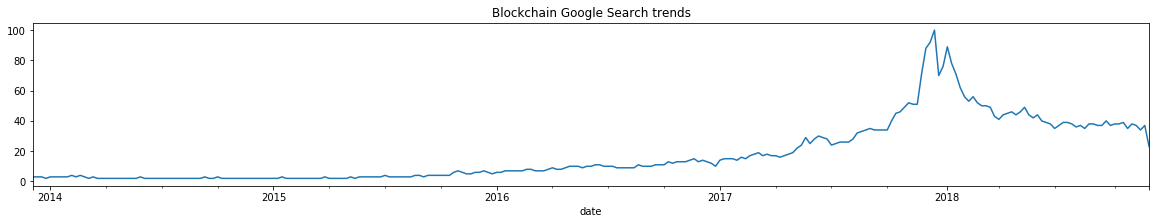

In [81]:
import matplotlib.pyplot as plt
df_block=df['Blockchain']
#df_block = df_block.set_index("Date")
# Use DataFrame.plot() in order to create a bar chart of the data
df_block.plot(kind="line", figsize=(20,3))
#instead, if you do a . afert plot, will autocomplete to see all the diff kinds of charts available, indstead of using the 'kind'
#method showed here; 

# Set a title for the chart
plt.title("Blockchain Google Search trends")

plt.show()

In [82]:
df.head()

,Blockchain,isPartial
date,,
2013-12-08,3,False
2013-12-15,3,False
2013-12-22,3,False
2013-12-29,2,False
2014-01-05,3,False


In [ ]:
import pandas as pd
import urllib as u
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings("ignore")
def _get_eps_estimates(url):
    try:
        html_source = u.request.urlopen(url).read()
        soup = bs(html_source, 'lxml')
        # 
        # table
        table = soup.find_all('table', attrs={'class': 'yfnc_tableout1'})
        header = [th.text for th in table[0].find_all(class_='yfnc_tablehead1')]
        header_title = header[0]
        header_cols = header[1:5]
        index_row_labels = header[-5:]
        body = [[td.text for td in row.select('td')] for row in table[0].find_all('tr')]
        body = body[1:]
        df = pd.DataFrame.from_records(body)
        df = df.ix[:, 1:]
        df.index = index_row_labels
        header_cols = pd.Series(header_cols)
        header_cols = header_cols.str.replace(
            'Year', 'Year ').str.replace('Qtr.', 'Qtr. ')
        df.columns = header_cols
        eps_est = df.convert_objects(convert_numeric=True)
    except Exception as e:
        print(e)
    return eps_est